In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Домашнее задание

Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
Построить круговую диаграмму по количеству имен, начинающихся на R за 1950 год. •
Построить точечную диаграмму по количеству согласных букв в имени и частоте употребления за 100 лет.
Задание необходимо выполнить в Jupiter, выложить ноутбук на github (файл ipynb) и прислать ссылку.

In [3]:
# Загрузка всех файлов за все года
names_by_year = {}
for year in range(1880, 2016, 1):
    names_by_year[year] = pd.read_csv(
        'StatisticNamesUSA/yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [4]:
names_all.head()

Name Gender  Count
Year Pos                         
1880 0         Mary      F   7065
     1         Anna      F   2604
     2         Emma      F   2003
     3    Elizabeth      F   1939
     4       Minnie      F   1746

##### Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [8]:
years = list(range(1900, 2001))
count_ruth  = []
count_robert  = []
for year in years:
    data = names_by_year[year]
    count_ruth.append(data[data.Name == 'Ruth'].Count.sum())
    count_robert.append(data[data.Name == 'Robert'].Count.sum())

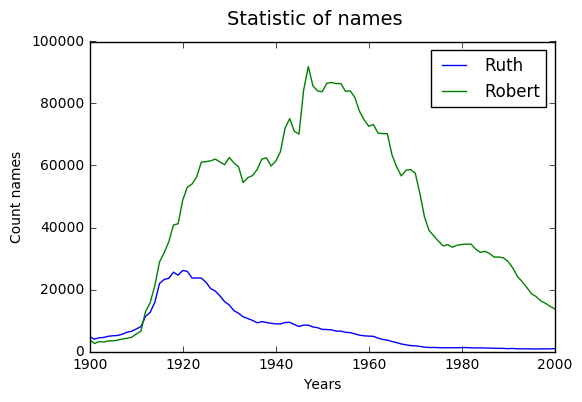

In [10]:
fig = plt.figure()
plt.plot(years, count_ruth, color='blue', label="Ruth")
plt.plot(years, count_robert, color='green', label="Robert")
fig.suptitle('Statistic of names', fontsize=14)
plt.xlabel('Years')
plt.ylabel('Count names')
plt.legend()
plt.show()

##### Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками

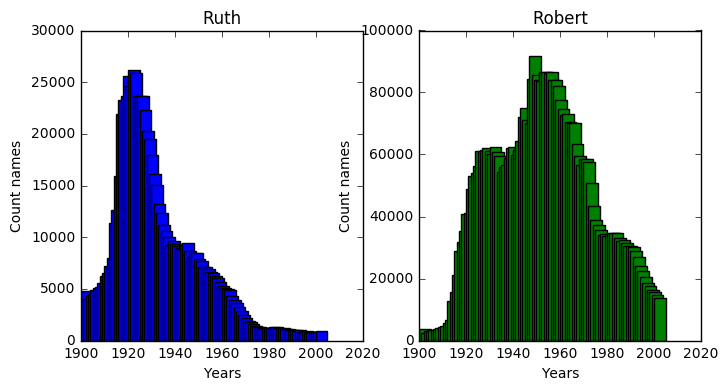

In [31]:
# Гистограммы
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))
# Ruth
ax0.bar(years,count_ruth, 5, facecolor='b')
ax0.set_title('Ruth')
ax0.set_xlabel('Years')
ax0.set_ylabel('Count names')
# Robert
ax1.bar(years,count_robert, 5, facecolor='g')
ax1.set_title('Robert')
ax1.set_xlabel('Years')
ax1.set_ylabel('Count names')

##### Построить круговую диаграмму по количеству имен, начинающихся на R за 1950 год.

In [59]:
# Находит те строки в серии, значение которых начинается на R букву
def begin_r(series):
    res = []
    for v in series:
        if v.upper().startswith('R'):
            res.append(True)
        else:
            res.append(False)
    return res

In [74]:
data = names_by_year[1950]
data = data[begin_r(data['Name'])]

In [75]:
# Группировка по имени
data = data.groupby('Name').sum().sort_values(by='Count', ascending=False)

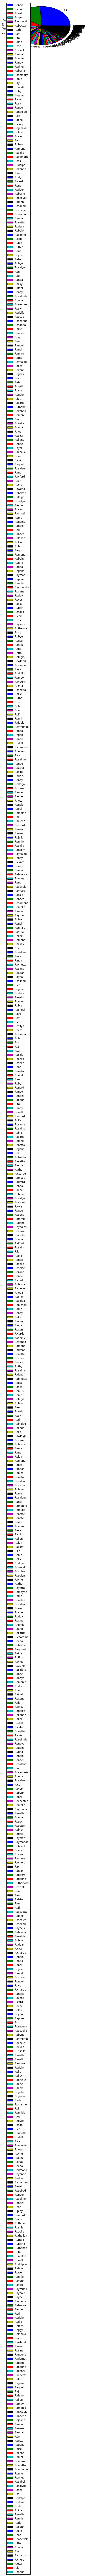

In [77]:
# График от pandas
data.plot.pie(y='Count')

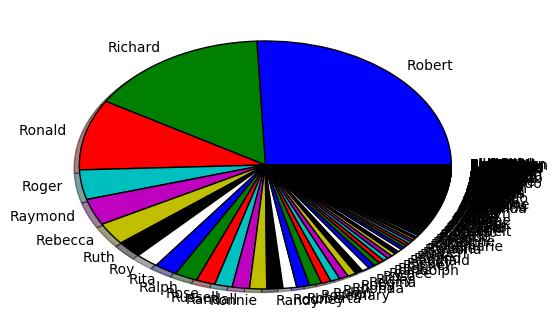

In [92]:
# График от matplotlib
plt.pie(data['Count'], labels=data.index, shadow=True)
plt.show()

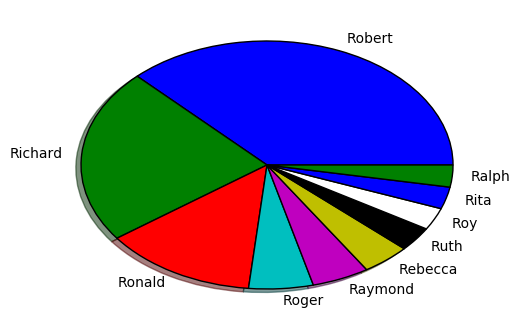

In [91]:
# Возьмем ТОП-10 имен
plt.pie(data['Count'].head(10), labels=data.index[:10], shadow=True)
plt.show()

##### Построить точечную диаграмму по количеству согласных букв в имени и частоте употребления за 100 лет.

In [95]:
# Количество согласных букв в слове
def count_consonant(word):
    count_consonant = 0
    vowels = ['A', 'E', 'I', 'O', 'U', 'Y']
    for letter in word:
        if letter.upper() not in vowels:
            count_consonant += 1
    return count_consonant

In [116]:
# Выбираем столетие и считаем необходимую метрику для него
years = list(range(1900, 2001))
century = pd.concat([data for year, data in names_by_year.items() if year in years])
century = century.groupby('Name').sum()
century["Consonants"] = list(map(count_consonant, century.index))
#century

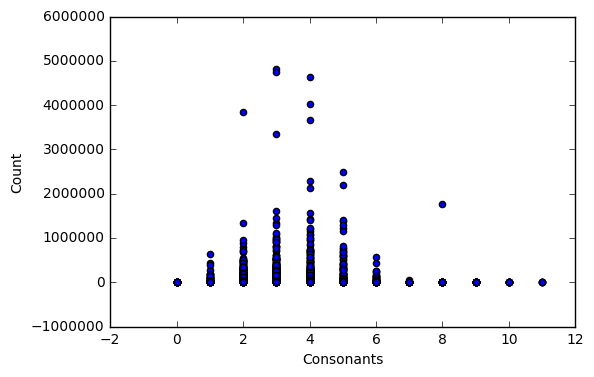

In [120]:
# График "Consonants in century 1900 - 2000"
century.plot.scatter(x='Consonants', y='Count')